In [16]:
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [36]:
import pandas as pd
import re
import os

file_paths = [
    r"C:\Users\backo\Downloads\Cottbus vs Rot-Weiss Essen.xlsx",
    r"C:\Users\backo\Downloads\Dortmund vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\1860 munich vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Sandhausen vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Aue.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Viktoria koeln.xlsx",
    r"C:\Users\backo\Downloads\Unterhaching vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Waldhof.xlsx",
    r"C:\Users\backo\Downloads\_Rostock vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Ingolstadt.xlsx"
]

all_player_positions_data = []

def extract_positions_from_text(text, filename):
    positions = []
    text = text.replace(u'\xa0', u' ')
    # Remove the "Home" or "Away" prefix if present
    if text.startswith("Home"):
        text = text[4:]
    elif text.startswith("Away"):
        text = text[4:]

    # Print the text *before* applying the regex
    print(f"Text before regex in {filename}: {text[:500]}...")

    # Modified regex to handle spaces and newlines more flexibly and correctly
    player_points_match = re.search(r'"playerPoints"\s*:\s*\[\s*({.*?})\s*\]', text, re.DOTALL)
    if player_points_match:
        player_points_str = player_points_match.group(1)
        individual_points = re.findall(r'\{.*?"x"\s*:\s*(\d+)\s*,\s*"y"\s*:\s*(\d+).*?\}', player_points_str, re.DOTALL)
        for match in individual_points:
            try:
                x = int(match[0])
                y = int(match[1])
                positions.append({'x': x, 'y': y})
            except ValueError:
                print(f"ValueError converting x or y in {filename}: {match}")
    print(f"Extracted {len(positions)} positions from text in {filename}")
    return pd.DataFrame(positions)


def extract_player_positions_data(file_path):
    try:
        file_path = os.path.normpath(file_path)
        print(f"Processing file: {file_path}")
        df_raw = pd.read_excel(file_path, sheet_name='player positions')
        filename = os.path.basename(file_path).replace(".xlsx", "").lower()
        print(f"  Filename: {filename}")

        current_file_positions = []

        cottbus_is_home = "cottbus" in filename and filename.find("cottbus") < filename.find("vs")
        cottbus_is_away = "cottbus" in filename and filename.find("cottbus") > filename.find("vs")

        for col in df_raw.columns:
            print(f"  Processing column: {col}")
            if col == 'Home':
                team_name = "Energie Cottbus" if cottbus_is_home else "Opponent"
                # Convert the Series to a string, handling NaNs
                text = df_raw[col].astype(str).str.cat(sep='\n', na_rep='')
                print(f"    Text from Home column (first 200 chars): {text[:200]}")
                positions_df = extract_positions_from_text(text, filename)
                if not positions_df.empty:
                    print(f"    Shape of positions_df: {positions_df.shape}")
                    positions_df['match'] = filename
                    positions_df['team'] = team_name
                    current_file_positions.append(positions_df)
                else:
                    print("    positions_df is empty")
            elif col == 'Away':
                team_name = "Energie Cottbus" if cottbus_is_away else "Opponent"
                # Convert the Series to a string, handling NaNs
                text = df_raw[col].astype(str).str.cat(sep='\n', na_rep='')
                print(f"    Text from Away column (first 200 chars): {text[:200]}")
                positions_df = extract_positions_from_text(text, filename)
                if not positions_df.empty:
                    print(f"    Shape of positions_df: {positions_df.shape}")
                    positions_df['match'] = filename
                    positions_df['team'] = team_name
                    current_file_positions.append(positions_df)
                else:
                    print("    positions_df is empty")

        if not current_file_positions:
            print(f"  No data extracted from file: {filename}")
            return pd.DataFrame()

        return pd.concat(current_file_positions, ignore_index=True)

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return pd.DataFrame()

# Process all files
for file_path in file_paths:
    positions_df = extract_player_positions_data(file_path)
    if not positions_df.empty:
        all_player_positions_data.append(positions_df)

if all_player_positions_data:
    all_player_positions_df = pd.concat(all_player_positions_data, ignore_index=True)
    print(f"Shape of final DataFrame: {all_player_positions_df.shape}")
else:
    all_player_positions_df = pd.DataFrame()
    print(f"No data extracted from any files.")

# Flip coordinates for 'Away' teams
if not all_player_positions_df.empty:
    for index, row in all_player_positions_df.iterrows():
        if row['team'] == 'Opponent' and 'cottbus' in row['match']:
            if 'vs cottbus' in row['match']:
                pass
            else:
                all_player_positions_df.loc[index, 'x'] = 100 - row['x']
        elif row['team'] == 'Energie Cottbus' and 'vs cottbus' in row['match']:
            all_player_positions_df.loc[index, 'x'] = 100 - row['x']

print("Combined Player Positions Data:")
if all_player_positions_df.empty:
    print("No data extracted from any files.")
else:
    print(all_player_positions_df.head())


Processing file: C:\Users\backo\Downloads\Cottbus vs Rot-Weiss Essen.xlsx
  Filename: cottbus vs rot-weiss essen
  Processing column: Home
    Text from Home column (first 200 chars): {
"playerPoints": [
{
"x": 29,
"y": 54
},
{
"x": 29,
"y": 68
},
{
"x": 40,
"y": 82
},
{
"x": 38,
"y": 93
},
{
"x": 31,
"y": 58
},
{
"x": 14,
"y": 60
},
{
"x": 61,
"y": 72
},
{
"x": 44,
"y": 53
},
{
"x
Text before regex in cottbus vs rot-weiss essen: {
"playerPoints": [
{
"x": 29,
"y": 54
},
{
"x": 29,
"y": 68
},
{
"x": 40,
"y": 82
},
{
"x": 38,
"y": 93
},
{
"x": 31,
"y": 58
},
{
"x": 14,
"y": 60
},
{
"x": 61,
"y": 72
},
{
"x": 44,
"y": 53
},
{
"x": 45,
"y": 51
},
{
"x": 42,
"y": 56
},
{
"x": 40,
"y": 84
},
{
"x": 42,
"y": 91
},
{
"x": 26,
"y": 89
},
{
"x": 27,
"y": 85
},
{
"x": 7,
"y": 69
},
{
"x": 30,
"y": 48
},
{
"x": 41,
"y": 65
},
{
"x": 37,
"y": 80
},
{
"x": 29,
"y": 54
},
{
"x": 53,
"y": 50
},
{
"x": 52,
"y": 60
},
{
"x": 60,
"y": 78
...
Extracted 831 positions from text in cottbus vs rot-weiss esse

In [37]:
import pandas as pd
import re
import os

file_paths = [
    r"C:\Users\backo\Downloads\Cottbus vs Rot-Weiss Essen.xlsx",
    r"C:\Users\backo\Downloads\Dortmund vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\1860 munich vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Sandhausen vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Aue.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Viktoria koeln.xlsx",
    r"C:\Users\backo\Downloads\Unterhaching vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Waldhof.xlsx",
    r"C:\Users\backo\Downloads\_Rostock vs cottbus.xlsx",
    r"C:\Users\backo\Downloads\Cottbus vs Ingolstadt.xlsx"
]

all_player_positions_data = []

def extract_positions_from_text(text, filename):
    positions = []
    text = text.replace(u'\xa0', u' ')
    if text.startswith("Home"):
        text = text[4:]
    elif text.startswith("Away"):
        text = text[4:]
    player_points_match = re.search(r'"playerPoints"\s*:\s*\[\s*({.*?})\s*\]', text, re.DOTALL)
    if player_points_match:
        player_points_str = player_points_match.group(1)
        individual_points = re.findall(r'\{.*?"x"\s*:\s*(\d+)\s*,\s*"y"\s*:\s*(\d+).*?\}', player_points_str, re.DOTALL)
        for match in individual_points:
            try:
                x = int(match[0])
                y = int(match[1])
                positions.append({'x': x, 'y': y})
            except ValueError:
                pass
    return pd.DataFrame(positions)


def extract_player_positions_data(file_path):
    try:
        file_path = os.path.normpath(file_path)
        df_raw = pd.read_excel(file_path, sheet_name='player positions')
        filename = os.path.basename(file_path).replace(".xlsx", "").lower()

        current_file_positions = []

        cottbus_is_home = "cottbus" in filename and filename.find("cottbus") < filename.find("vs")
        cottbus_is_away = "cottbus" in filename and filename.find("cottbus") > filename.find("vs")

        for col in df_raw.columns:
            if col == 'Home':
                team_name = "Energie Cottbus" if cottbus_is_home else "Opponent"
                text = df_raw[col].astype(str).str.cat(sep='\n', na_rep='')
                positions_df = extract_positions_from_text(text, filename)
                if not positions_df.empty:
                    positions_df['match'] = filename
                    positions_df['team'] = team_name
                    current_file_positions.append(positions_df)
            elif col == 'Away':
                team_name = "Energie Cottbus" if cottbus_is_away else "Opponent"
                text = df_raw[col].astype(str).str.cat(sep='\n', na_rep='')
                positions_df = extract_positions_from_text(text, filename)
                if not positions_df.empty:
                    positions_df['match'] = filename
                    positions_df['team'] = team_name
                    current_file_positions.append(positions_df)

        if not current_file_positions:
            return pd.DataFrame()

        return pd.concat(current_file_positions, ignore_index=True)

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return pd.DataFrame()

# Process all files
for file_path in file_paths:
    positions_df = extract_player_positions_data(file_path)
    if not positions_df.empty:
        all_player_positions_data.append(positions_df)

if all_player_positions_data:
    all_player_positions_df = pd.concat(all_player_positions_data, ignore_index=True)
else:
    all_player_positions_df = pd.DataFrame()

# Flip coordinates for 'Away' teams
if not all_player_positions_df.empty:
    for index, row in all_player_positions_df.iterrows():
        if row['team'] == 'Opponent' and 'cottbus' in row['match']:
            if 'vs cottbus' in row['match']:
                pass
            else:
                all_player_positions_df.loc[index, 'x'] = 100 - row['x']
        elif row['team'] == 'Energie Cottbus' and 'vs cottbus' in row['match']:
            all_player_positions_df.loc[index, 'x'] = 100 - row['x']

print("Combined Player Positions Data:")
if all_player_positions_df.empty:
    print("No data extracted from any files.")
else:
    print(all_player_positions_df.head())


Combined Player Positions Data:
    x   y                       match             team
0  29  54  cottbus vs rot-weiss essen  Energie Cottbus
1  29  68  cottbus vs rot-weiss essen  Energie Cottbus
2  40  82  cottbus vs rot-weiss essen  Energie Cottbus
3  38  93  cottbus vs rot-weiss essen  Energie Cottbus
4  31  58  cottbus vs rot-weiss essen  Energie Cottbus


In [38]:
for match in all_player_positions_df['match'].unique():
    print(f"\n--- Match: {match} ---")
    print(all_player_positions_df[all_player_positions_df['match'] == match]['team'].unique())


--- Match: cottbus vs rot-weiss essen ---
['Energie Cottbus' 'Opponent']

--- Match: dortmund vs cottbus ---
['Opponent' 'Energie Cottbus']

--- Match: 1860 munich vs cottbus ---
['Opponent' 'Energie Cottbus']

--- Match: sandhausen vs cottbus ---
['Opponent' 'Energie Cottbus']

--- Match: cottbus vs aue ---
['Energie Cottbus' 'Opponent']

--- Match: cottbus vs viktoria koeln ---
['Energie Cottbus' 'Opponent']

--- Match: unterhaching vs cottbus ---
['Opponent' 'Energie Cottbus']

--- Match: cottbus vs waldhof ---
['Energie Cottbus' 'Opponent']

--- Match: _rostock vs cottbus ---
['Opponent' 'Energie Cottbus']

--- Match: cottbus vs ingolstadt ---
['Energie Cottbus' 'Opponent']


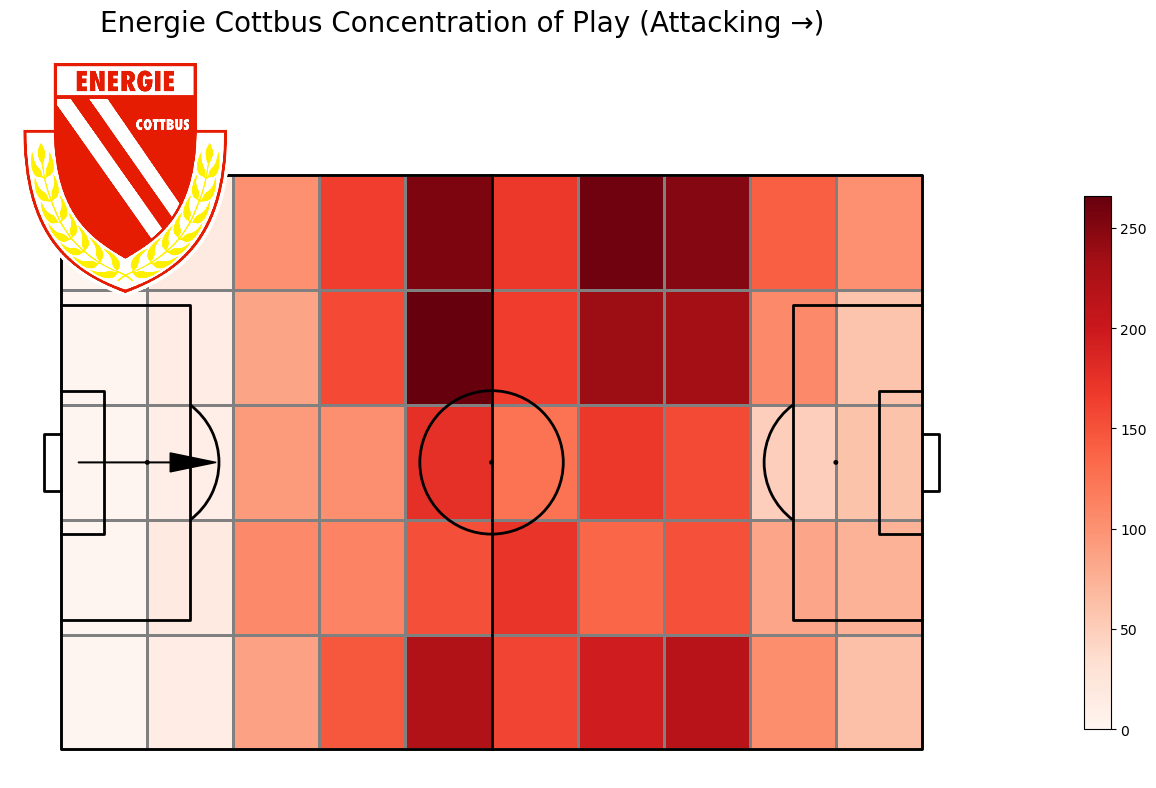

Left side concentration: 3723.0
Right side concentration: 2216.0
Concentration is higher on the left side.


In [40]:

# --- Visualization ---
pitch = Pitch(pitch_type='statsbomb', pitch_color='white',
              line_color='black', goal_type='box', line_zorder=2)
fig, ax = pitch.draw(figsize=(14, 8))

# Calculate 2D histogram for player positions
bin_statistic = pitch.bin_statistic(cottbus_positions_df['x'], cottbus_positions_df['y'],
                                     statistic='count', bins=(10, 5), normalize=False)

# Reverse the columns to flip the heatmap horizontally (StatsBomb vs. Opta)
reversed_statistic = bin_statistic["statistic"][:, ::-1]

# Plot the reversed heatmap
pcm = pitch.heatmap({
    "statistic": reversed_statistic,
    "x_grid": bin_statistic["x_grid"],
    "y_grid": bin_statistic["y_grid"]
}, cmap='Reds', edgecolor='grey', ax=ax)

# Add a colorbar
fig.colorbar(pcm, ax=ax, location='right', fraction=0.02, pad=0.1)

# Set the title
fig.suptitle('Energie Cottbus Concentration of Play (Attacking →)', fontsize=20) # Added Direction

# Invert y-axis to match the pitch
# ax.invert_yaxis() # StatsBomb y-axis is already inverted

# Add an arrow to indicate attacking direction
arrow_start_x = 0.05  # Start x-position of the arrow (normalized axes coordinates)
arrow_start_y = 0.5   # Start y-position of the arrow (normalized axes coordinates)
arrow_end_x = 0.15    # End x-position of the arrow
arrow_end_y = 0.5
ax.arrow(arrow_start_x, arrow_start_y, arrow_end_x - arrow_start_x, arrow_end_y - arrow_start_y,
         head_width=0.03, head_length=0.05, fc='black', ec='black',
         transform=ax.transAxes, zorder=3)  # Ensure arrow is on top

# Load and display the flag
try:
    flag_img = mpimg.imread(r'C:\Users\backo\Downloads\Logo_Energie_Cottbus.png')
    imagebox = OffsetImage(flag_img, zoom=0.3)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (0.1, 0.95), xycoords='axes fraction', frameon=False) #Adjust position
    ax.add_artist(ab)
except FileNotFoundError:
    print("Flag image not found.")

plt.show()

# Calculate concentration on left vs. right (adjusting bin slicing for 10 x-bins)
left_side = bin_statistic["statistic"][:3, :].sum()  # First 3 x-bins (roughly left 30%)
right_side = bin_statistic["statistic"][3:, :].sum() # Last 3 x-bins (roughly right 30%)

print(f"Left side concentration: {left_side}")
print(f"Right side concentration: {right_side}")

if left_side < right_side:
    print("Concentration is higher on the right side.")
elif right_side < left_side:
    print("Concentration is higher on the left side.")
else:
    print("Concentration is evenly distributed (roughly central focus).")


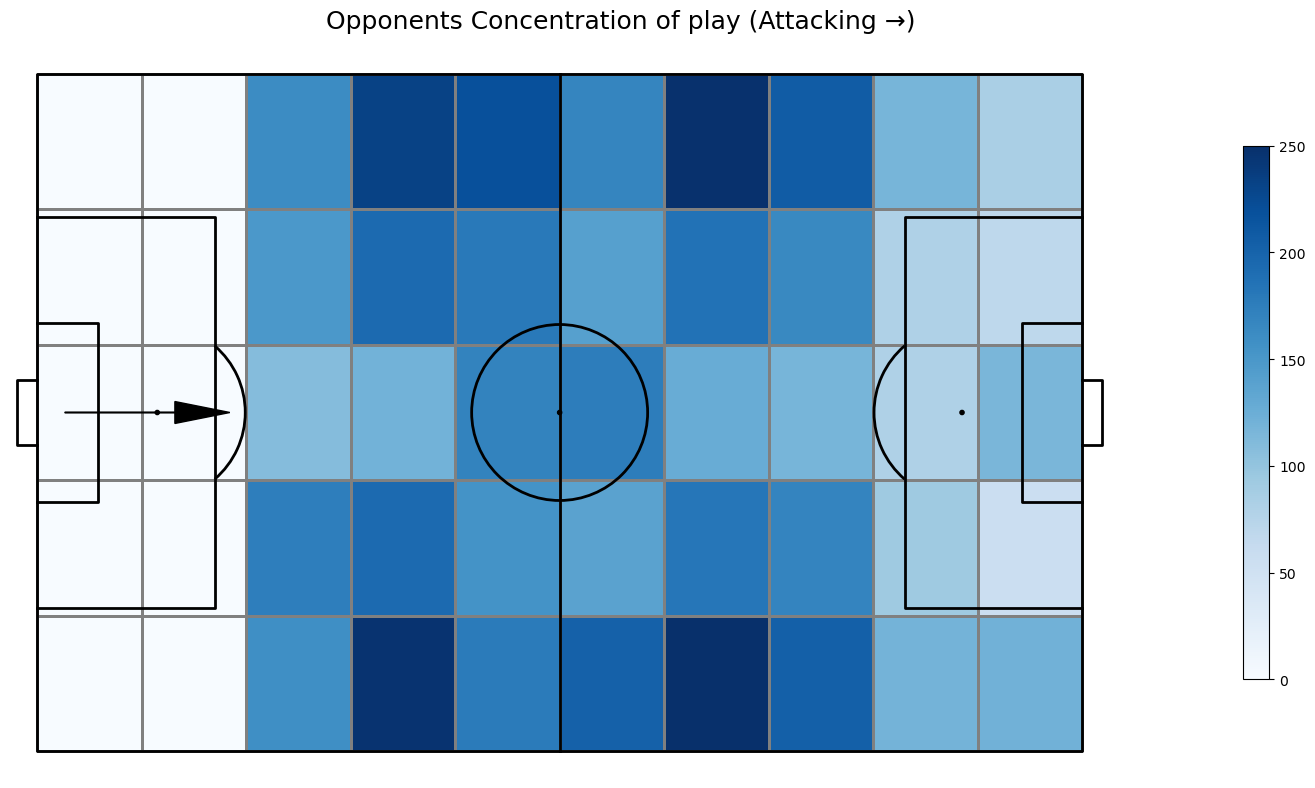

Opponents Left side concentration: 3624.0
Opponents Right side concentration: 2645.0
Opponents concentration is higher on their left side (Energie Cottbus's right).


In [42]:
# Filter for Opponent positions
opponent_positions_df = all_player_positions_df[all_player_positions_df['team'] == 'Opponent'].copy()

# Define the attacking half for Energie Cottbus (and therefore the defensive half for the opponent)
attacking_half_x_min = 20  # StatsBomb x-coordinates for halfway line
attacking_half_x_max = 100

# Filter opponent positions to include only those in Energie Cottbus's attacking half
opponent_defensive_half_df = opponent_positions_df[
    (opponent_positions_df['x'] >= attacking_half_x_min) & (opponent_positions_df['x'] <= attacking_half_x_max)
].copy()

# --- Visualization for Opponents in their Defensive Half ---
pitch_opp_def = Pitch(pitch_type='opta', pitch_color='white',
                      line_color='black', goal_type='box', line_zorder=2)
fig_opp_def, ax_opp_def = pitch_opp_def.draw(figsize=(14, 8))

# Calculate 2D histogram for opponent player positions in their defensive half
bin_statistic_opp_def = pitch_opp_def.bin_statistic(
    opponent_defensive_half_df['x'], opponent_defensive_half_df['y'],
    statistic='count', bins=(10, 5), normalize=False
)

# Plot the heatmap
pcm_opp_def = pitch_opp_def.heatmap({
    "statistic": bin_statistic_opp_def["statistic"],
    "x_grid": bin_statistic_opp_def["x_grid"],
    "y_grid": bin_statistic_opp_def["y_grid"]
}, cmap='Blues', edgecolor='grey', ax=ax_opp_def)

# Add a colorbar
fig_opp_def.colorbar(pcm_opp_def, ax=ax_opp_def, location='right', fraction=0.02, pad=0.1)

# Set the title
fig_opp_def.suptitle('Opponents Concentration of play (Attacking →)', fontsize=18)

# Invert y-axis
#ax_opp_def.invert_yaxis() # StatsBomb y-axis is already inverted

# Add an arrow indicating Energie Cottbus's attacking direction
arrow_start_x = 0.05
arrow_start_y = 0.5
arrow_end_x = 0.15
arrow_end_y = 0.5
ax_opp_def.arrow(arrow_start_x, arrow_start_y, arrow_end_x - arrow_start_x, arrow_end_y - arrow_start_y,
                 head_width=0.03, head_length=0.05, fc='black', ec='black',
                 transform=ax_opp_def.transAxes, zorder=3)

plt.show()

# Calculate concentration on left vs. right for opponents in their defensive half
left_side_opp_def = bin_statistic_opp_def["statistic"][:3, :].sum()  # Roughly the left half of their defensive third
right_side_opp_def = bin_statistic_opp_def["statistic"][3:, :].sum() # Roughly the right half of their defensive third

print(f"Opponents Left side concentration: {left_side_opp_def}")
print(f"Opponents Right side concentration: {right_side_opp_def}")

if left_side_opp_def < right_side_opp_def:
    print("Opponents concentration is higher on their right side (Energie Cottbus's left).")
elif right_side_opp_def < left_side_opp_def:
    print("Opponents concentration is higher on their left side (Energie Cottbus's right).")
else:
    print("Opponents concentration is evenly distributed centrally.")